# Surf's Up!

In [1]:
# Dependencies
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime
from datetime import date

# Step 1 - Climate Analysis and Exploration

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Reflect an existing database into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [3]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

## Precipitation Analysis

In [4]:
# Find the last date of measurements in the database and record it
prcp_data = session.query(Measurement.date) \
                   .distinct(Measurement.date) \
                   .order_by(desc(Measurement.date)) \
                   .first() 

# Check if last date found is correct
for row in prcp_data:
    last_date = row
    print(last_date)
    

2017-08-23


In [15]:
# Subract 1 years from the last date of measurements to find the beginning date for our query
last_date_obj = datetime.datetime.strptime(last_date, "%Y-%m-%d")
first_date_obj = last_date_obj.replace(last_date_obj.year - 1)

# Check if first date found is correct
first_date = str(first_date_obj.date())
print (first_date)


2016-08-23


In [6]:
# Design a query to retrieve the last 12 months of precipitation data
prcp_data = session.query(Measurement.date, Measurement.prcp) \
                   .filter(Measurement.date >= first_date) \
                   .order_by(Measurement.date) \
                   .all()

# Set above query results to dataframe
df_prcp_data = pd.DataFrame(data=prcp_data)
# Drop any NaN records
df_prcp_data = df_prcp_data.dropna(how='any')
# Set the index to the date column
df_prcp_data = df_prcp_data.set_index("date")
df_prcp_data.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


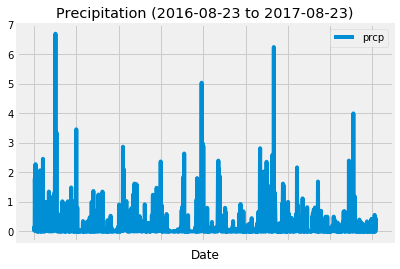

In [7]:
# Plot the results using the DataFrame plot method
df_prcp_data.plot(kind="line")

# Define labels
tmp = " to "
plt.title("Precipitation (" + first_date + tmp + last_date + ")")
plt.xlabel("Date")

# Define and position legend
plt.legend(loc="upper right")

# Show plot
plt.show()

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Precipitation_Plot.png", bbox_inches="tight")
plt.show()

In [8]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prcp_data.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [9]:
# Count all unique stations from Measurement table
station_count  = session.query(Measurement) \
                        .group_by(Measurement.station) \
                        .count()

# How many stations are available in this dataset?
print("Total Number of stations: "  + str(station_count))


Total Number of stations: 9


In [10]:
# Find most active stations from Measurement table
station_activity = session.query(Measurement.station, func.count(Measurement.tobs)) \
                          .group_by(Measurement.station) \
                          .order_by(func.count(Measurement.tobs).desc()) \
                          .all()

# List the stations and the counts in descending order
df_station_activity = pd.DataFrame(data=station_activity, columns=['Station', 'Count'])
df_station_activity.head(10)

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [11]:
# Which station has the highest number of observations?
station_1_ID = df_station_activity["Station"][0]

print("Station with highest number of observatoins: "  + station_1_ID)


Station with highest number of observatoins: USC00519281


In [12]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_1 = session.query(Measurement.station, Measurement.date, Measurement.tobs) \
                   .filter(Measurement.station == station_1_ID) \
                   .filter(Measurement.date >= first_date) \
                   .all()

df_station_1 = pd.DataFrame(data=station_1)
df_station_1.head()

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0


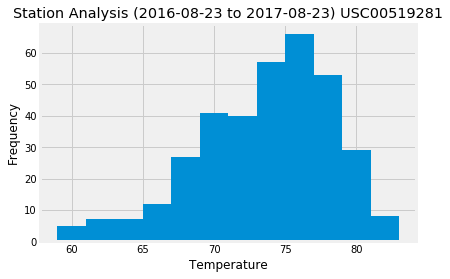

In [13]:
# Plot the temperature data in a histogram with 12 bins

plt.hist(df_station_1['tobs'], 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Station Analysis (" + first_date + tmp + last_date + ") " + station_1_ID)

# Show plot
plt.show()

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Temperature_Plot.png", bbox_inches="tight")
plt.show()

## Step 2 - Climate App 